In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
Datos = pd.read_csv('E:\heart_cleveland_upload.csv')

In [7]:
Datos.head(60)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

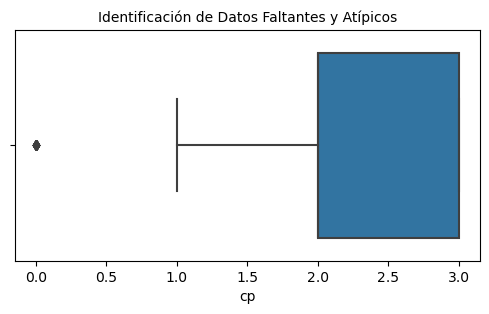

In [9]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

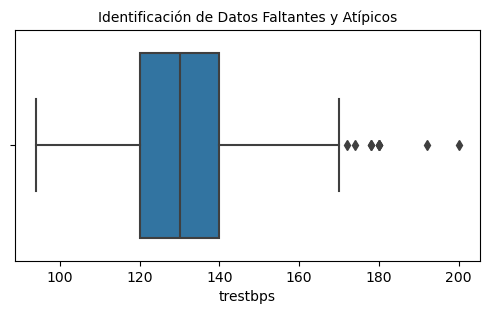

In [10]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

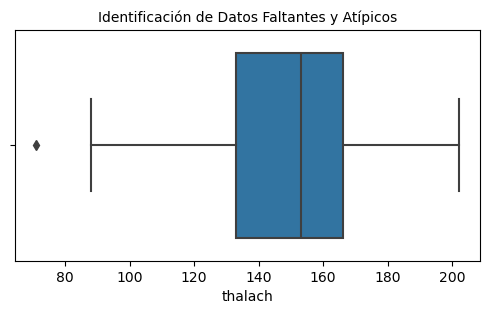

In [11]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [12]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Tipo de dolor en el pecho: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol Serico: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados electrocardiograficos: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresion del ST inducida: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en Tipo de dolor en el pecho:  23
Cantidad de Registros con cero en Colesterol Serico:  0
Cantidad de Registros con cero en Resultados electrocardiograficos:  147
Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada:  0
Cantidad de Registros con cero en Depresion del ST inducida:  96


In [13]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['thalach']=Datos['thalach'].replace(0,Datos['thalach'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [14]:
#Revisión nuevamente de datos faltantes
print("Cantidad de Registros con cero en Tipo de dolor en el pecho: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol Serico: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados electrocardiograficos: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresion del ST inducida: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en Tipo de dolor en el pecho:  0
Cantidad de Registros con cero en Colesterol Serico:  0
Cantidad de Registros con cero en Resultados electrocardiograficos:  0
Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada:  0
Cantidad de Registros con cero en Depresion del ST inducida:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

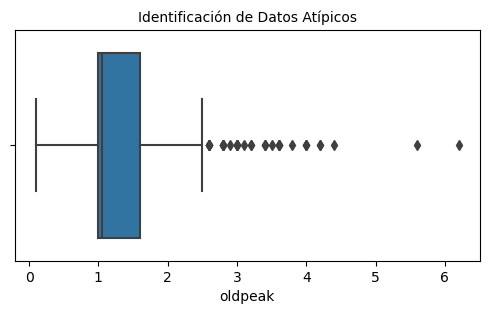

In [15]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [16]:
#Conteo de Datos Atípicos
nivel_minimo=1
nivel_maximo=3
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 85


In [17]:
# Filtra Datos Atípicos
Datos=Datos[(Datos['oldpeak']<nivel_maximo)&(Datos['oldpeak']>nivel_minimo)]

In [19]:
# Validar si se removieron los datos atípicos
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [20]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 1 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        194 non-null    int64  
 1   sex        194 non-null    int64  
 2   cp         194 non-null    float64
 3   trestbps   194 non-null    int64  
 4   chol       194 non-null    int64  
 5   fbs        194 non-null    int64  
 6   restecg    194 non-null    float64
 7   thalach    194 non-null    int64  
 8   exang      194 non-null    int64  
 9   oldpeak    194 non-null    float64
 10  slope      194 non-null    int64  
 11  ca         194 non-null    int64  
 12  thal       194 non-null    int64  
 13  condition  194 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 22.7 KB


In [21]:
# Total de personas con Enfermedad cardiaca
Datos['condition'].value_counts()

condition
0    108
1     86
Name: count, dtype: int64

In [22]:
Datos[['condition']].head(50)

,condition
1,0
2,0
3,1
4,0
6,0
7,1
11,1
14,0
15,0
16,0


In [23]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [24]:
print (X_train)

     age  sex   cp  trestbps  chol  fbs   restecg  thalach  exang   oldpeak  \
294   35    1  3.0       120   198    0  0.996633      130      1  1.600000   
261   51    1  3.0       140   261    0  2.000000      186      1  1.055556   
195   61    0  3.0       130   330    0  2.000000      169      0  1.055556   
36    56    1  1.0       120   240    0  0.996633      169      0  1.055556   
62    42    1  1.0       120   295    0  0.996633      162      0  1.055556   
..   ...  ...  ...       ...   ...  ...       ...      ...    ...       ...   
169   66    1  3.0       160   228    0  2.000000      138      0  2.300000   
135   46    0  2.0       142   177    0  2.000000      160      1  1.400000   
132   47    1  2.0       138   257    0  2.000000      156      0  1.055556   
227   57    1  3.0       110   201    0  0.996633      126      1  1.500000   
114   53    1  2.0       130   197    1  2.000000      152      0  1.200000   

     slope  ca  thal  
294      1   0     2  
261  

In [25]:
print (Y_train)

294    1
261    0
195    1
36     0
62     0
      ..
169    0
135    0
132    0
227    0
114    0
Name: condition, Length: 145, dtype: int64


In [26]:
# Construir el modelo de regresión logística 
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [27]:
print (Y_test)

209    1
3      1
79     0
202    1
45     1
134    0
151    0
112    0
201    1
200    1
140    0
265    0
244    1
147    0
255    1
278    0
237    1
69     0
238    1
133    1
190    1
155    1
22     0
121    0
188    0
214    1
281    1
67     0
18     1
174    1
82     0
253    0
44     0
158    1
54     0
66     0
154    0
273    1
285    0
254    0
205    1
89     0
11     1
86     1
123    0
43     0
178    0
29     0
127    0
Name: condition, dtype: int64


In [28]:
print (Prediccion)

[0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 0]


In [29]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.78      0.64      0.70        22

    accuracy                           0.76        49
   macro avg       0.76      0.74      0.75        49
weighted avg       0.76      0.76      0.75        49



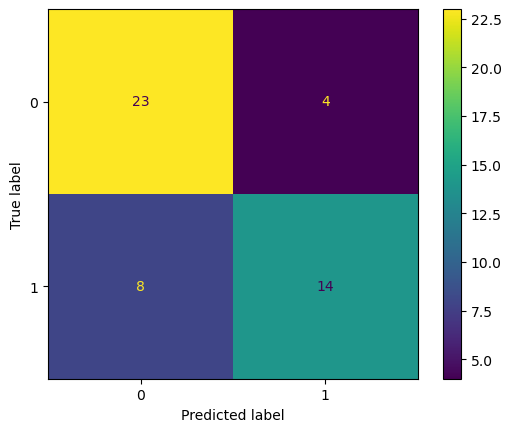

In [30]:
#Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

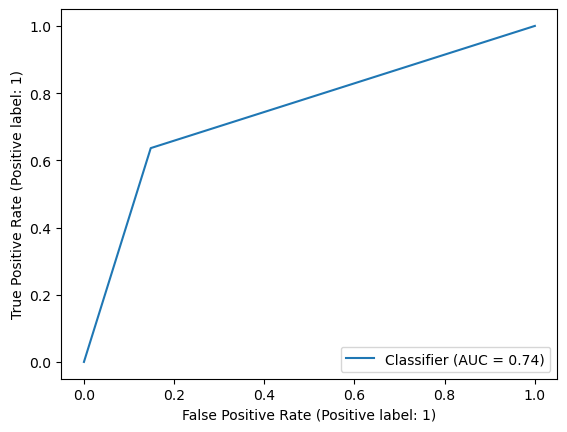

In [31]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()